### Importando bibliotecas

In [324]:
import matplotlib.pyplot as plt #criar gráficos
import seaborn as sns #criar gráficos
import pandas as pd #importar dados e trabalhar com DataFrame
import statsmodels.api as sm # biblioteca de modelagem estatística
from statsmodels.discrete.discrete_model import MNLogit
from scipy import stats # estatística chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier

### Importando os Dados

In [325]:
dados = pd.read_csv('Employee Attrition.csv', sep = ',')
dados.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


### Data Warilling

In [326]:
dados.shape

(15787, 10)

In [327]:
dados.isna().sum()

Emp ID                   788
satisfaction_level       788
last_evaluation          788
number_project           788
average_montly_hours     788
time_spend_company       788
Work_accident            788
promotion_last_5years    788
dept                     788
salary                   788
dtype: int64

In [328]:
dados = dados.dropna()
dados.shape

(14999, 10)

In [329]:
dados.isna().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [330]:
dados.drop(columns=['Emp ID'], inplace= True)
dados.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


### Avaliando o nível de satisfação

<Axes: xlabel='satisfaction_level'>

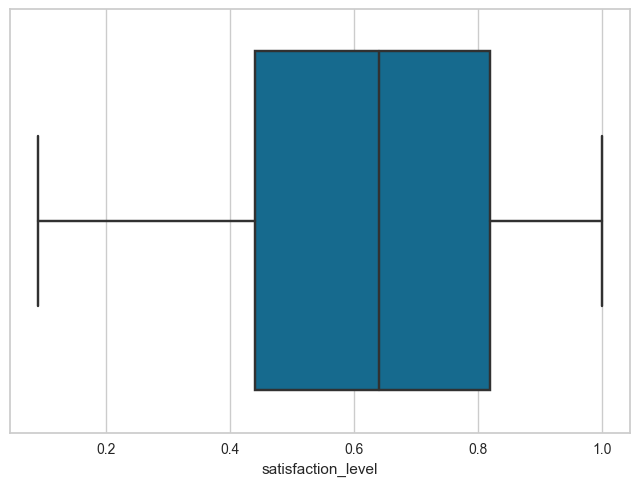

In [331]:
sns.boxplot(x=dados['satisfaction_level'])

In [332]:
dados

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low
...,...,...,...,...,...,...,...,...,...
15782,0.40,0.57,2.0,151.0,3.0,0.0,0.0,support,low
15783,0.37,0.48,2.0,160.0,3.0,0.0,0.0,support,low
15784,0.37,0.53,2.0,143.0,3.0,0.0,0.0,support,low
15785,0.11,0.96,6.0,280.0,4.0,0.0,0.0,support,low


In [333]:
dados['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [334]:
dados = pd.get_dummies(dados, columns=['dept','salary'], drop_first= True)
dados.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0


In [335]:
dados.loc[dados['satisfaction_level']>0.75,
                            'NivelDeSatisfacao'] = 2 #categoria de referência
dados.loc[dados['satisfaction_level']<=0.75,
                            'NivelDeSatisfacao'] = 1
dados.loc[dados['satisfaction_level']<0.5,
                            'NivelDeSatisfacao'] = 0

dados

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium,NivelDeSatisfacao
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1,2.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0,1.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15782,0.40,0.57,2.0,151.0,3.0,0.0,0.0,0,0,0,0,0,0,0,1,0,1,0,0.0
15783,0.37,0.48,2.0,160.0,3.0,0.0,0.0,0,0,0,0,0,0,0,1,0,1,0,0.0
15784,0.37,0.53,2.0,143.0,3.0,0.0,0.0,0,0,0,0,0,0,0,1,0,1,0,0.0
15785,0.11,0.96,6.0,280.0,4.0,0.0,0.0,0,0,0,0,0,0,0,1,0,1,0,0.0


### Regressão

In [336]:
x = dados.drop(columns=['satisfaction_level','NivelDeSatisfacao'])
y = dados['NivelDeSatisfacao']

#Esse pacote precisa que a constante seja definida pelo usuário
X = sm.add_constant(x)

#Estimação do modelo - função 'MNLogit' do pacote
#'statsmodels.discrete.discrete_model'
modelo = MNLogit(endog=y, exog=X).fit()

#Parâmetros do modelo
modelo.summary()

Optimization terminated successfully.
         Current function value: 1.047951
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:      NivelDeSatisfacao   No. Observations:                14999
Model:                        MNLogit   Df Residuals:                    14963
Method:                           MLE   Df Model:                           34
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                 0.04456
Time:                        14:42:47   Log-Likelihood:                -15718.
converged:                       True   LL-Null:                       -16451.
Covariance Type:            nonrobust   LLR p-value:                1.370e-286
=========================================================================================
  NivelDeSatisfacao=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4854      0.151     -3.206      0.001      -0.782      -0.189
last_evaluation           2.9119      0.139     20.874      0.000       2.638       3.185
number_project           -0.1718      0.020     -8.765      0.000      -0.210      -0.133
average_montly_hours      0.0029      0.000      6.016      0.000       0.002       0.004
time_spend_company       -0.2411      0.015    -15.748      0.000      -0.271      -0.211
Work_accident             0.5965      0.063      9.485      0.000       0.473       0.720
promotion_last_5years     0.5842      0.162      3.606      0.000       0.267       0.902
dept_RandD                0.0333      0.118      0.282      0.778      -0.198       0.265
dept_accounting          -0.3221      0.116     -2.782      0.005      -0.549      -0.095
dept_hr                  -0.2597      0.118     -2.208      0.027      -0.490      -0.029
dept_management           0.3170      0.131      2.418      0.016       0.060       0.574
dept_marketing           -0.1412      0.114     -1.234      0.217      -0.366       0.083
dept_product_mng         -0.1142      0.113     -1.010      0.312      -0.336       0.107
dept_sales               -0.1003      0.084     -1.199      0.230      -0.264       0.064
dept_support             -0.0717      0.092     -0.784      0.433      -0.251       0.108
dept_technical           -0.0924      0.088     -1.049      0.294      -0.265       0.080
salary_low               -0.6695      0.084     -7.991      0.000      -0.834      -0.505
salary_medium            -0.3490      0.084     -4.138      0.000      -0.514      -0.184
-----------------------------------------------------------------------------------------
  NivelDeSatisfacao=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.8253      0.154    -11.818      0.000      -2.128      -1.523
last_evaluation           3.5883      0.141     25.532      0.000       3.313       3.864
number_project           -0.1402      0.020     -7.149      0.000      -0.179      -0.102
average_montly_hours      0.0042      0.000      8.854      0.000       0.003       0.005
time_spend_company       -0.1517      0.015    -10.438      0.000      -0.180      -0.123
Work_accident             0.4997      0.064      7.791      0.000       0.374       0.625
promotion_last_5years     0.5858      0.164      3.577      0.000       0.265       0.907
dept_RandD                0.0345      0.119      0.289      0.773      -0.200       0.269
dept_accounting          -0.3982      0.118     -3.365      0.001      -0.630      -0.166
dept_hr                  -0.2743      0.120     -2.294      0.022      -0.509      -0.040
dept_management           0.0323      0.136      0.237      0.813      -0.235       0.300
dept_marketing           -0.0966      0.115     -0.839      0.401      -0.322       0.129
d

In [337]:

def Qui2(modelo_multinomial):
    maximo = modelo_multinomial.llf
    minimo = modelo_multinomial.llnull
    qui2 = -2*(minimo - maximo)
    pvalue = stats.distributions.chi2.sf(qui2,1)
    df = pd.DataFrame({'Qui quadrado':[qui2],
                       'pvalue':[pvalue]})
    return df

In [338]:
Qui2(modelo)

,Qui quadrado,pvalue
0,1466.264347,0.0


In [339]:
dados

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium,NivelDeSatisfacao
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1,2.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0,1.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15782,0.40,0.57,2.0,151.0,3.0,0.0,0.0,0,0,0,0,0,0,0,1,0,1,0,0.0
15783,0.37,0.48,2.0,160.0,3.0,0.0,0.0,0,0,0,0,0,0,0,1,0,1,0,0.0
15784,0.37,0.53,2.0,143.0,3.0,0.0,0.0,0,0,0,0,0,0,0,1,0,1,0,0.0
15785,0.11,0.96,6.0,280.0,4.0,0.0,0.0,0,0,0,0,0,0,0,1,0,1,0,0.0


In [340]:
# In[ ]: Adicionando as probabilidades de ocorrência de cada uma das
#categorias de Y definidas pela modelagem, bem como a respectiva
#classificação, ao dataframe original

#Probabilidades de ocorrência das três categoriais
#Definição do array 'phats':
phats = modelo.predict()
phats

#Transformação do array 'phats' para o dataframe 'phats':
phats = pd.DataFrame(phats)
phats

#Concatenando o dataframe original com o dataframe 'phats':
dados = pd.concat([dados, phats], axis=1)
dados

# Analisando o resultado de acordo com a categoria de resposta:
predicao = phats.idxmax(axis=1)
predicao

#Adicionando a categoria de resposta 'predicao' ao dataframe original,
#por meio da criação da variável 'predicao'
dados['predicao'] = predicao
dados

#Criando a variável 'predicao_label' a partir da variável 'predicao',
#respeitando os seguintes rótulos:
# 0: não chegou atrasado
# 1: chegou atrasado primeira aula
# 2: chegou atrasado segunda aula

dados.loc[dados['predicao']==0,
                            'predicao_label'] =0
dados.loc[dados['predicao']==1,
                            'predicao_label'] =1
dados.loc[dados['predicao']==2,
                            'predicao_label'] =2

dados = dados.dropna()
dados

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_RandD,dept_accounting,dept_hr,...,dept_support,dept_technical,salary_low,salary_medium,NivelDeSatisfacao,0,1,2,predicao,predicao_label
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.432024,0.310816,0.257161,0.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,0.274698,0.278594,0.446708,2.0,2.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.241793,0.307256,0.450951,2.0,2.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.316943,0.273402,0.409655,2.0,2.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.438221,0.307984,0.253795,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.90,0.55,3.0,259.0,10.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.403473,0.329868,0.266659,0.0,0.0
14995,0.74,0.95,5.0,266.0,10.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.466724,0.301272,0.232004,0.0,0.0
14996,0.85,0.54,3.0,185.0,10.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.441564,0.314043,0.244393,0.0,0.0
14997,0.33,0.65,3.0,172.0,10.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.211713,0.308143,0.480144,2.0,2.0


In [341]:
dados['predicao_label'].value_counts(sort=False) 

0.0    4820
2.0    4897
1.0    4494
Name: predicao_label, dtype: int64

In [342]:
dados['NivelDeSatisfacao'].value_counts(sort=False) 

0.0    4019
2.0    4995
1.0    5197
Name: NivelDeSatisfacao, dtype: int64

In [343]:
table = pd.pivot_table(dados,
                       index=['predicao_label'],
                       columns=['NivelDeSatisfacao'],
                       aggfunc='size')

#Substituindo 'NaN' por zero
table = table.fillna(0)
table

#Transformando o dataframe 'table' para 'array', para que seja possível
#estabelecer o atributo 'diagonal'
table = table.to_numpy()
table

#Eficiência global do modelo
acuracia = table.diagonal().sum()/table.sum()
acuracia


0.4227007247906551

### Árvore de Decisão 

In [347]:
dados = pd.read_csv('Employee Attrition.csv', sep = ',')
dados = dados.dropna()
dados.drop(columns=['Emp ID'], inplace= True)
dados = pd.get_dummies(dados, columns=['dept','salary'], drop_first= True)
dados.loc[dados['satisfaction_level']>0.75,
                            'NivelDeSatisfacao'] = 2 #categoria de referência
dados.loc[dados['satisfaction_level']<=0.75,
                            'NivelDeSatisfacao'] = 1
dados.loc[dados['satisfaction_level']<0.5,
                            'NivelDeSatisfacao'] = 0

In [348]:
x = dados.drop(columns=['satisfaction_level','NivelDeSatisfacao'])
y = dados['NivelDeSatisfacao']

In [349]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.15, random_state = 0)

In [351]:
arvore = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
arvore.fit(x_treinamento,y_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [352]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([0., 1., 1., ..., 2., 0., 0.])

In [353]:
accuracy_score(y_teste,previsoes_arvore)

0.6377777777777778

C:\Users\bruno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6377777777777778

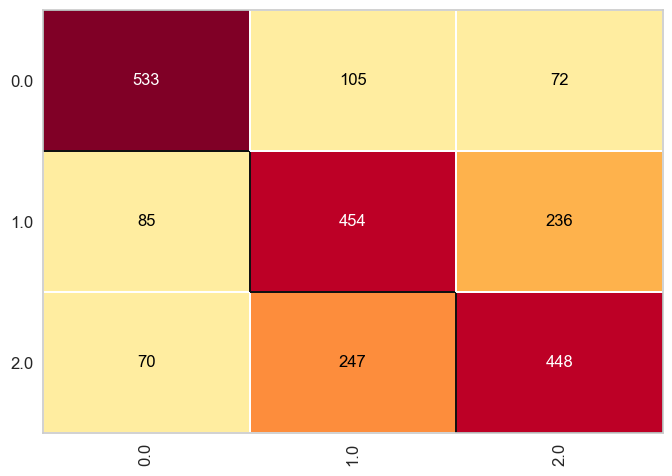

In [354]:
cm = ConfusionMatrix(arvore)
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste,y_teste)

In [355]:
print(classification_report(y_teste,previsoes_arvore))

              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76       710
         1.0       0.56      0.59      0.57       775
         2.0       0.59      0.59      0.59       765

    accuracy                           0.64      2250
   macro avg       0.64      0.64      0.64      2250
weighted avg       0.64      0.64      0.64      2250



### Random Forest

In [356]:
random_forest = RandomForestClassifier(n_estimators= 150, criterion= 'entropy', random_state= 0)
random_forest.fit(x_treinamento,y_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=0)

In [357]:
previsoes_random_forest = random_forest.predict(x_teste)
previsoes_random_forest

array([0., 1., 1., ..., 2., 0., 0.])

In [358]:
accuracy_score(y_teste,previsoes_random_forest)

0.6546666666666666

C:\Users\bruno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.6546666666666666

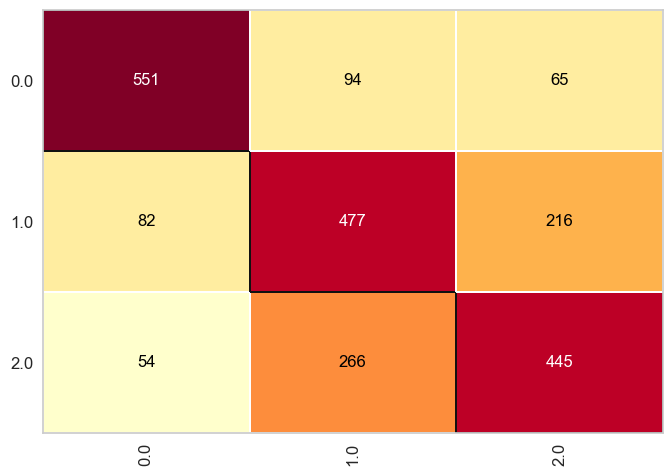

In [359]:
cm = ConfusionMatrix(random_forest)
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste,y_teste)

### Redes Neurais

In [360]:
rede_neural_credit = MLPClassifier(max_iter= 1000, verbose= True, 
                                   solver = 'adam', activation= 'relu',
                                   hidden_layer_sizes= (150,150))
rede_neural_credit.fit(x_treinamento,y_treinamento)

Iteration 1, loss = 1.99201601
Iteration 2, loss = 1.12091861
Iteration 3, loss = 1.15670491
Iteration 4, loss = 1.13905485
Iteration 5, loss = 1.13354073
Iteration 6, loss = 1.15450272
Iteration 7, loss = 1.11911404
Iteration 8, loss = 1.09460715
Iteration 9, loss = 1.13633547
Iteration 10, loss = 1.15288162
Iteration 11, loss = 1.12497015
Iteration 12, loss = 1.11326249
Iteration 13, loss = 1.10077639
Iteration 14, loss = 1.11648504
Iteration 15, loss = 1.10961008
Iteration 16, loss = 1.08989362
Iteration 17, loss = 1.25117341
Iteration 18, loss = 1.15659892
Iteration 19, loss = 1.17840792
Iteration 20, loss = 1.10495029
Iteration 21, loss = 1.11655987
Iteration 22, loss = 1.09008168
Iteration 23, loss = 1.10675797
Iteration 24, loss = 1.10576776
Iteration 25, loss = 1.08614656
Iteration 26, loss = 1.08625938
Iteration 27, loss = 1.08747577
Iteration 28, loss = 1.08875299
Iteration 29, loss = 1.06030543
Iteration 30, loss = 1.11620518
Iteration 31, loss = 1.08574317
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(150, 150), max_iter=1000, verbose=True)

In [361]:
previsoes_rede_neural = rede_neural_credit.predict(x_teste)
previsoes_rede_neural

array([0., 1., 1., ..., 0., 0., 0.])

In [362]:
accuracy_score(y_teste,previsoes_rede_neural)

0.5386666666666666

C:\Users\bruno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


0.5386666666666666

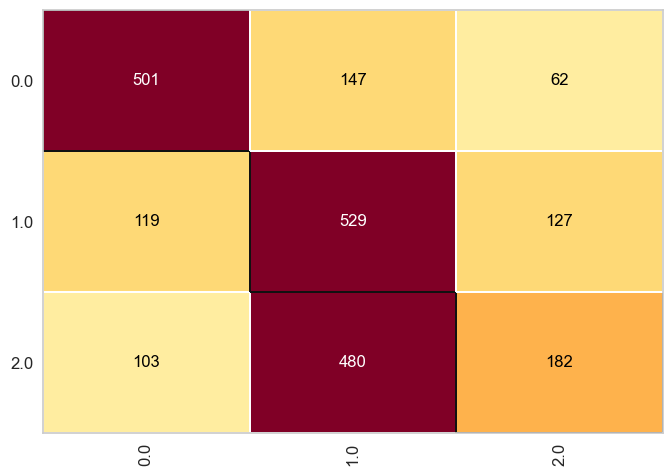

In [363]:
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste,y_teste)